In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
from sklearn.metrics import roc_curve, auc
import mne
#import tensorflow as tf
#from tensorflow.keras import layers, models

In [11]:
#load in data set
#df = pd.read_csv("data/features_threshold2.csv")
df = pd.read_csv("data/features_threshold2_with_group.csv")
df

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,1,1,Happy,0.0,1,-3.422360,-3.407271,-3.395252,-3.104803,-3.037113,...,-3.441302,-3.462409,-3.453269,-3.290267,-3.381428,-3.350545,-3.449323,-3.435478,-3.291059,-3.345204
1,1,1,Happy,4.0,1,-3.258561,-3.398565,-3.314030,-3.020850,-2.975785,...,-3.360849,-3.284660,-3.381245,-3.242928,-3.325246,-3.253718,-3.299499,-3.341165,-3.215881,-3.331336
2,1,1,Happy,8.0,1,-3.284074,-3.323022,-3.356280,-2.974764,-2.917822,...,-3.299664,-3.375210,-3.320121,-3.173927,-3.312416,-3.339905,-3.355006,-3.312267,-3.160410,-3.293299
3,1,1,Happy,12.0,1,-3.201600,-3.299180,-3.311574,-3.033837,-2.982768,...,-3.293371,-3.294892,-3.260700,-3.131814,-3.310152,-3.286941,-3.291466,-3.268754,-3.149677,-3.318427
4,1,1,Happy,16.0,1,-3.358728,-3.369795,-3.354496,-3.007128,-3.015792,...,-3.351484,-3.416596,-3.298293,-3.232556,-3.264344,-3.330132,-3.355514,-3.260524,-3.200624,-3.264135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,16,3,Disgust,160.0,45,-3.477286,-3.481992,-3.364156,-2.936320,-2.951800,...,-3.368272,-3.618694,-3.483955,-3.288282,-3.268125,-3.369936,-3.619288,-3.486662,-3.285683,-3.263599
30108,16,3,Disgust,164.0,45,-3.503612,-3.476807,-3.323326,-2.933907,-2.949533,...,-3.504770,-3.498274,-3.461674,-3.264564,-3.295100,-3.505706,-3.504029,-3.462277,-3.259018,-3.295507
30109,16,3,Disgust,168.0,45,-3.520455,-3.494451,-3.280831,-2.918250,-2.952944,...,-3.329556,-3.393151,-3.472894,-3.280582,-3.279309,-3.333191,-3.393081,-3.474900,-3.278928,-3.274531
30110,16,3,Disgust,172.0,45,-3.495019,-3.390789,-3.306180,-2.906062,-2.917791,...,-3.523147,-3.542632,-3.537710,-3.288601,-3.272306,-3.520470,-3.540720,-3.542245,-3.288907,-3.274443


## Subject Generic Training

In [18]:
#data, label split
data = df.iloc[:,5:]
#labels = df['Label']
data

,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FP2_Delta,FP2_Theta,FP2_Alpha,FP2_Beta,FP2_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,-3.422360,-3.407271,-3.395252,-3.104803,-3.037113,-3.377032,-3.397867,-3.420328,-3.155506,-3.131974,...,-3.441302,-3.462409,-3.453269,-3.290267,-3.381428,-3.350545,-3.449323,-3.435478,-3.291059,-3.345204
1,-3.258561,-3.398565,-3.314030,-3.020850,-2.975785,-3.224803,-3.328604,-3.281914,-3.059058,-3.057781,...,-3.360849,-3.284660,-3.381245,-3.242928,-3.325246,-3.253718,-3.299499,-3.341165,-3.215881,-3.331336
2,-3.284074,-3.323022,-3.356280,-2.974764,-2.917822,-3.158512,-3.229438,-3.301371,-3.060271,-3.080072,...,-3.299664,-3.375210,-3.320121,-3.173927,-3.312416,-3.339905,-3.355006,-3.312267,-3.160410,-3.293299
3,-3.201600,-3.299180,-3.311574,-3.033837,-2.982768,-3.146273,-3.257737,-3.290951,-3.110376,-3.069618,...,-3.293371,-3.294892,-3.260700,-3.131814,-3.310152,-3.286941,-3.291466,-3.268754,-3.149677,-3.318427
4,-3.358728,-3.369795,-3.354496,-3.007128,-3.015792,-3.264888,-3.353187,-3.350664,-3.079788,-3.126371,...,-3.351484,-3.416596,-3.298293,-3.232556,-3.264344,-3.330132,-3.355514,-3.260524,-3.200624,-3.264135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,-3.477286,-3.481992,-3.364156,-2.936320,-2.951800,-3.535205,-3.469398,-3.328274,-2.996771,-2.997064,...,-3.368272,-3.618694,-3.483955,-3.288282,-3.268125,-3.369936,-3.619288,-3.486662,-3.285683,-3.263599
30108,-3.503612,-3.476807,-3.323326,-2.933907,-2.949533,-3.485006,-3.536062,-3.394501,-3.012276,-3.001632,...,-3.504770,-3.498274,-3.461674,-3.264564,-3.295100,-3.505706,-3.504029,-3.462277,-3.259018,-3.295507
30109,-3.520455,-3.494451,-3.280831,-2.918250,-2.952944,-3.452494,-3.471607,-3.363387,-2.952676,-2.982394,...,-3.329556,-3.393151,-3.472894,-3.280582,-3.279309,-3.333191,-3.393081,-3.474900,-3.278928,-3.274531
30110,-3.495019,-3.390789,-3.306180,-2.906062,-2.917791,-3.561277,-3.445555,-3.405669,-3.013104,-3.001797,...,-3.523147,-3.542632,-3.537710,-3.288601,-3.272306,-3.520470,-3.540720,-3.542245,-3.288907,-3.274443


In [4]:
correlation_matrix = data.corr()

In [5]:
#test_train_split
condition = df['Session'] == 3

#test
test = df[condition]
X_test_unscaled = test.iloc[:,5:]
X_test_unscaled
y_test = test['Label']
y_test

#train
train = df[~condition]
X_train_unscaled = train.iloc[:,5:]
y_train = train['Label']
groups = train['Group']

In [6]:
#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [7]:
#perform pca
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_

In [8]:
#MLP Hyper Parameter Tuning
mlp = MLPClassifier(max_iter=250)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 1],
    'learning_rate': ['constant','adaptive'],
}
kf = StratifiedGroupKFold(n_splits=3)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf.split(X_train_pca, y_train, groups=groups))
clf.fit(X_train_pca, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.252 (+/-0.100) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.252 (+/-0.073) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.247 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.261 (+/-0.082) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.254 (+/-0.082) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.257 (+/-0.057) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'ada

E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 61.91%


E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(50.722222222222214, 0.5, 'True Label')

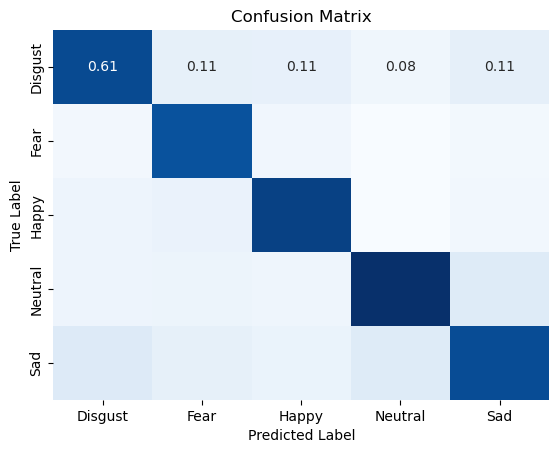

In [12]:
best_params =   clf.best_params_
# Create an MLP classifier with the best hyperparameters
mlp_model = MLPClassifier(**best_params)


mlp_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_train_pca)


# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Get unique class labels
classes = sorted(set(y_train))


conf_mat = confusion_matrix(y_train, y_pred)

# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy: 29.71%
Accuracy: 29.71%


Text(50.722222222222214, 0.5, 'True Label')

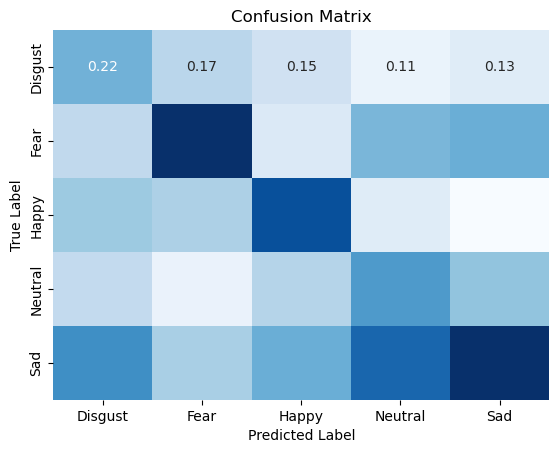

In [13]:
y_pred = mlp_model.predict(X_test_pca)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [14]:
percent_correct

,Disgust,Fear,Happy,Neutral,Sad
Disgust,0.220814,0.169414,0.148374,0.112764,0.127090
Fear,0.164706,0.352106,0.132791,0.214817,0.224638
Happy,0.192760,0.180403,0.320461,0.127046,0.096433
Neutral,0.162896,0.114011,0.173442,0.246653,0.199554
Sad,0.258824,0.184066,0.224932,0.298721,0.352285


In [ ]:
#SVM Hyper Parameter Tuning
#train
svm_model = SVC(kernel='linear')

# Define the parameter grid for C
param_grid = {'C': 10.0 ** np.arange(-3, 5, 1)}

# Create a three-fold cross-validation object with explicit train-test splitting
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train_pca,y_train)
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Accuracy: 34.65%


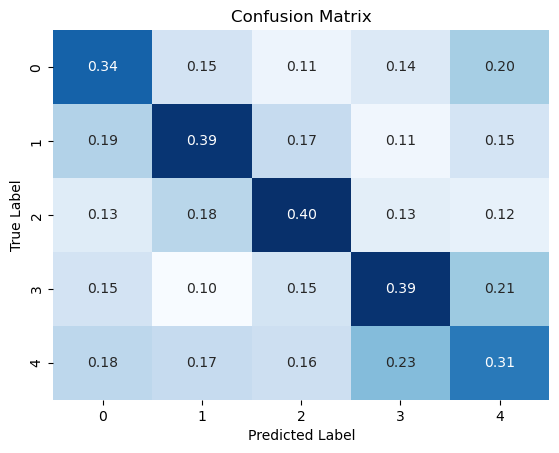

In [15]:
svm_model_optimal = SVC(kernel='linear',C = grid_search.best_params_['C'])
svm_model_optimal.fit(X_train_pca, y_train)
y_pred = svm_model_optimal.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy: 29.47%


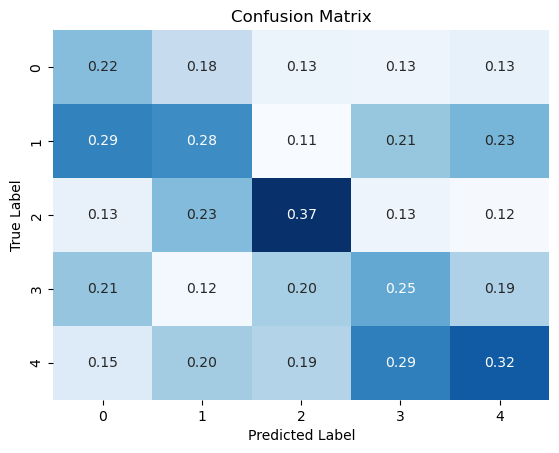

In [16]:
y_pred = svm_model_optimal.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Subject Specific Training

In [46]:
condition = df['Subject'] == 1
subject_df = df[condition]
subject_df

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,1,1,Happy,0.0,1,-3.422360,-3.407271,-3.395252,-3.104803,-3.037113,...,-3.441302,-3.462409,-3.453269,-3.290267,-3.381428,-3.350545,-3.449323,-3.435478,-3.291059,-3.345204
1,1,1,Happy,4.0,1,-3.258561,-3.398565,-3.314030,-3.020850,-2.975785,...,-3.360849,-3.284660,-3.381245,-3.242928,-3.325246,-3.253718,-3.299499,-3.341165,-3.215881,-3.331336
2,1,1,Happy,8.0,1,-3.284074,-3.323022,-3.356280,-2.974764,-2.917822,...,-3.299664,-3.375210,-3.320121,-3.173927,-3.312416,-3.339905,-3.355006,-3.312267,-3.160410,-3.293299
3,1,1,Happy,12.0,1,-3.201600,-3.299180,-3.311574,-3.033837,-2.982768,...,-3.293371,-3.294892,-3.260700,-3.131814,-3.310152,-3.286941,-3.291466,-3.268754,-3.149677,-3.318427
4,1,1,Happy,16.0,1,-3.358728,-3.369795,-3.354496,-3.007128,-3.015792,...,-3.351484,-3.416596,-3.298293,-3.232556,-3.264344,-3.330132,-3.355514,-3.260524,-3.200624,-3.264135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,1,3,Disgust,160.0,45,-3.353615,-3.418494,-3.434205,-3.106786,-3.023977,...,-3.412650,-3.392302,-3.369334,-3.144495,-3.123254,-3.330999,-3.366587,-3.403741,-3.139204,-3.165913
1878,1,3,Disgust,164.0,45,-3.315054,-3.360803,-3.451657,-3.093230,-3.021340,...,-3.349815,-3.372044,-3.371081,-3.183902,-3.138550,-3.313775,-3.343657,-3.382726,-3.233765,-3.210858
1879,1,3,Disgust,168.0,45,-3.177348,-3.415524,-3.337212,-3.053203,-3.031744,...,-3.287601,-3.367746,-3.290429,-3.082219,-3.051167,-3.247927,-3.353250,-3.271192,-3.132620,-3.102604
1880,1,3,Disgust,172.0,45,-3.308425,-3.416949,-3.340591,-3.098486,-3.028161,...,-3.276367,-3.374731,-3.277705,-3.159232,-3.139728,-3.235378,-3.367979,-3.330935,-3.163059,-3.222739


In [47]:
#test_train_split
condition = subject_df['Session'] == 3

#test
test = subject_df[condition]
X_test_unscaled = test.iloc[:,5:]
X_test_unscaled
y_test = test['Label']
y_test

#train
train = subject_df[~condition]
X_train_unscaled = train.iloc[:,5:]
y_train = train['Label']
groups = train['Group']


#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)


#perform pca
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_

In [48]:
#MLP Hyper Parameter Tuning
mlp = MLPClassifier(max_iter=250)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 1],
    'learning_rate': ['constant','adaptive'],
}
kf = StratifiedGroupKFold(n_splits=3)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf.split(X_train_pca, y_train, groups=groups))
clf.fit(X_train_pca, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
#ofr mean, std, params in zip(means, stds, clf.cv_results_['params']):
 #   print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 94.85%


E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(50.722222222222214, 0.5, 'True Label')

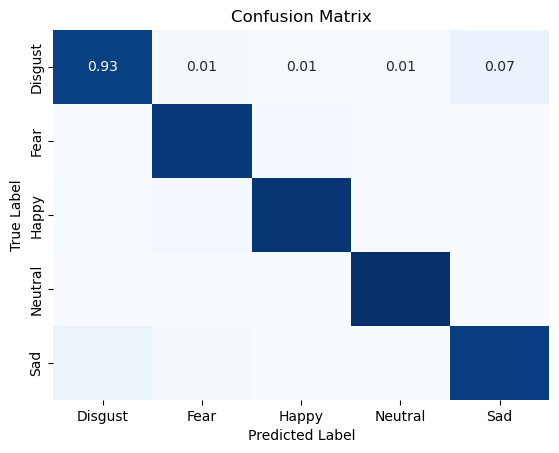

In [49]:
best_params =   clf.best_params_
# Create an MLP classifier with the best hyperparameters
mlp_model = MLPClassifier(**best_params)


mlp_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_train_pca)


# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Get unique class labels
classes = sorted(set(y_train))


conf_mat = confusion_matrix(y_train, y_pred)

# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy: 48.55%
Accuracy: 48.55%


Text(50.722222222222214, 0.5, 'True Label')

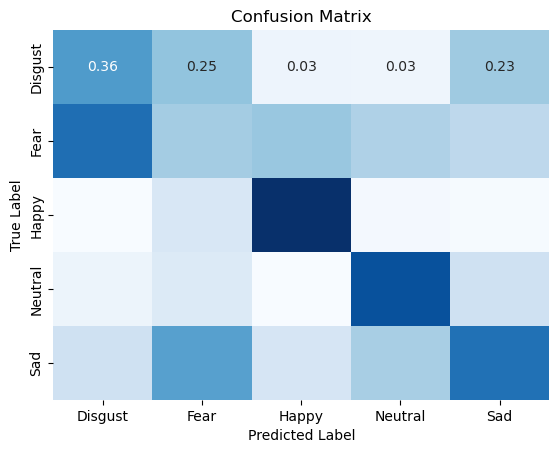

In [50]:
y_pred = mlp_model.predict(X_test_pca)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [223]:
subject_accuracy = []
for i in range(1,17):
    condition = df['Subject'] == i
    subject_df = df[condition]
    subject_df

    #test_train_split
    condition = subject_df['Session'] == 3
    
    #test
    test = subject_df[condition]
    X_test_unscaled = test.iloc[:,5:]
    X_test_unscaled
    y_test = test['Label']
    y_test
    
    #train
    train = subject_df[~condition]
    X_train_unscaled = train.iloc[:,5:]
    y_train = train['Label']
    groups = train['Group']
    
    
    #scale data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_unscaled)
    X_test = scaler.transform(X_test_unscaled)
    
    
    #perform pca
    pca = PCA(n_components=.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    #MLP Hyper Parameter Tuning
    mlp = MLPClassifier(max_iter=250)
    parameter_space = {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 1],
        'learning_rate': ['constant','adaptive'],
    }
    kf = StratifiedGroupKFold(n_splits=3)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf.split(X_train_pca, y_train, groups=groups))
    clf.fit(X_train_pca, y_train)
    best_params =   clf.best_params_


    
    # Create an MLP classifier with the best hyperparameters
    mlp_model = MLPClassifier(**best_params)

    #train model
    mlp_model.fit(X_train_pca, y_train)


    #test model
    y_pred = mlp_model.predict(X_test_pca)
    
    
    # Evaluate the model
    subject_accuracy.append(accuracy_score(y_test, y_pred))

E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

In [229]:
print(subject_accuracy)
print(np.mean(subject_accuracy))
print(np.std(subject_accuracy))

[0.47580645161290325, 0.567741935483871, 0.49838709677419357, 0.31451612903225806, 0.25161290322580643, 0.317741935483871, 0.31129032258064515, 0.4129032258064516, 0.5516129032258065, 0.2693548387096774, 0.2532258064516129, 0.26129032258064516, 0.4274193548387097, 0.22096774193548388, 0.26129032258064516, 0.3564516129032258]
0.3594758064516129
0.11073504971639282


## Frequency Band Specific Based Classification (subjects general)

In [38]:
#isolate frequency data
data = df.iloc[:, 5::5]
data

,FP1_Delta,FP2_Delta,AF3_Delta,AF4_Delta,F7_Delta,F5_Delta,F3_Delta,F1_Delta,FZ_Delta,F2_Delta,...,PO3_Delta,POZ_Delta,PO4_Delta,PO6_Delta,PO8_Delta,CB1_Delta,O1_Delta,OZ_Delta,O2_Delta,CB2_Delta
0,-3.422360,-3.377032,-3.435714,-3.488029,-3.421682,-3.500498,-3.499950,-3.505825,-3.545753,-3.539859,...,-3.422356,-3.428423,-3.472049,-3.425710,-3.405186,-3.353276,-3.378613,-3.392977,-3.441302,-3.350545
1,-3.258561,-3.224803,-3.302417,-3.277991,-3.321079,-3.362597,-3.373859,-3.395222,-3.360943,-3.344526,...,-3.384198,-3.343603,-3.300584,-3.324448,-3.283812,-3.297098,-3.351420,-3.327682,-3.360849,-3.253718
2,-3.284074,-3.158512,-3.314899,-3.242294,-3.355063,-3.337175,-3.318993,-3.372563,-3.359504,-3.327640,...,-3.362674,-3.331139,-3.329105,-3.346174,-3.341810,-3.331627,-3.341673,-3.322186,-3.299664,-3.339905
3,-3.201600,-3.146273,-3.255502,-3.258364,-3.352463,-3.373498,-3.436378,-3.456645,-3.441171,-3.384730,...,-3.263471,-3.256236,-3.293109,-3.294980,-3.304871,-3.317393,-3.283762,-3.272002,-3.293371,-3.286941
4,-3.358728,-3.264888,-3.386540,-3.329711,-3.415464,-3.461057,-3.385671,-3.380077,-3.393936,-3.385554,...,-3.390802,-3.357890,-3.374088,-3.401242,-3.391242,-3.377393,-3.349128,-3.346128,-3.351484,-3.330132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,-3.477286,-3.535205,-3.598478,-3.599082,-3.609794,-3.581936,-3.444710,-3.601975,-3.588384,-3.535624,...,-3.427186,-3.471577,-3.447036,-3.452333,-3.450949,-3.407019,-3.405035,-3.326438,-3.368272,-3.369936
30108,-3.503612,-3.485006,-3.520887,-3.495553,-3.674879,-3.563287,-3.589534,-3.555457,-3.530046,-3.533521,...,-3.392576,-3.504542,-3.441811,-3.428191,-3.420870,-3.461285,-3.464592,-3.447991,-3.504770,-3.505706
30109,-3.520455,-3.452494,-3.509961,-3.524995,-3.434894,-3.285117,-3.515735,-3.478248,-3.548309,-3.513970,...,-3.421853,-3.387330,-3.392501,-3.379658,-3.381356,-3.365793,-3.366547,-3.315435,-3.329556,-3.333191
30110,-3.495019,-3.561277,-3.610949,-3.609492,-3.557965,-3.589289,-3.615095,-3.557861,-3.471378,-3.566843,...,-3.383292,-3.502335,-3.470731,-3.474523,-3.469049,-3.492523,-3.489427,-3.470927,-3.523147,-3.520470


In [41]:
new_df = result_horizontal = pd.concat([df.iloc[:,:5], data], axis=1)
new_df

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP2_Delta,AF3_Delta,AF4_Delta,F7_Delta,...,PO3_Delta,POZ_Delta,PO4_Delta,PO6_Delta,PO8_Delta,CB1_Delta,O1_Delta,OZ_Delta,O2_Delta,CB2_Delta
0,1,1,Happy,0.0,1,-3.422360,-3.377032,-3.435714,-3.488029,-3.421682,...,-3.422356,-3.428423,-3.472049,-3.425710,-3.405186,-3.353276,-3.378613,-3.392977,-3.441302,-3.350545
1,1,1,Happy,4.0,1,-3.258561,-3.224803,-3.302417,-3.277991,-3.321079,...,-3.384198,-3.343603,-3.300584,-3.324448,-3.283812,-3.297098,-3.351420,-3.327682,-3.360849,-3.253718
2,1,1,Happy,8.0,1,-3.284074,-3.158512,-3.314899,-3.242294,-3.355063,...,-3.362674,-3.331139,-3.329105,-3.346174,-3.341810,-3.331627,-3.341673,-3.322186,-3.299664,-3.339905
3,1,1,Happy,12.0,1,-3.201600,-3.146273,-3.255502,-3.258364,-3.352463,...,-3.263471,-3.256236,-3.293109,-3.294980,-3.304871,-3.317393,-3.283762,-3.272002,-3.293371,-3.286941
4,1,1,Happy,16.0,1,-3.358728,-3.264888,-3.386540,-3.329711,-3.415464,...,-3.390802,-3.357890,-3.374088,-3.401242,-3.391242,-3.377393,-3.349128,-3.346128,-3.351484,-3.330132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,16,3,Disgust,160.0,45,-3.477286,-3.535205,-3.598478,-3.599082,-3.609794,...,-3.427186,-3.471577,-3.447036,-3.452333,-3.450949,-3.407019,-3.405035,-3.326438,-3.368272,-3.369936
30108,16,3,Disgust,164.0,45,-3.503612,-3.485006,-3.520887,-3.495553,-3.674879,...,-3.392576,-3.504542,-3.441811,-3.428191,-3.420870,-3.461285,-3.464592,-3.447991,-3.504770,-3.505706
30109,16,3,Disgust,168.0,45,-3.520455,-3.452494,-3.509961,-3.524995,-3.434894,...,-3.421853,-3.387330,-3.392501,-3.379658,-3.381356,-3.365793,-3.366547,-3.315435,-3.329556,-3.333191
30110,16,3,Disgust,172.0,45,-3.495019,-3.561277,-3.610949,-3.609492,-3.557965,...,-3.383292,-3.502335,-3.470731,-3.474523,-3.469049,-3.492523,-3.489427,-3.470927,-3.523147,-3.520470


In [42]:
#test_train_split
condition = new_df['Session'] == 3

#test
test = new_df[condition]
X_test_unscaled = test.iloc[:,5:]
X_test_unscaled
y_test = test['Label']
y_test

#train
train = new_df[~condition]
X_train_unscaled = train.iloc[:,5:]
y_train = train['Label']
groups = train['Group']


#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)


#perform pca
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_

In [43]:
#MLP Hyper Parameter Tuning
mlp = MLPClassifier(max_iter=250)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 1],
    'learning_rate': ['constant','adaptive'],
}
kf = StratifiedGroupKFold(n_splits=3)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf.split(X_train_pca, y_train, groups=groups))
clf.fit(X_train_pca, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
#ofr mean, std, params in zip(means, stds, clf.cv_results_['params']):
 #   print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 50.99%


E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(50.722222222222214, 0.5, 'True Label')

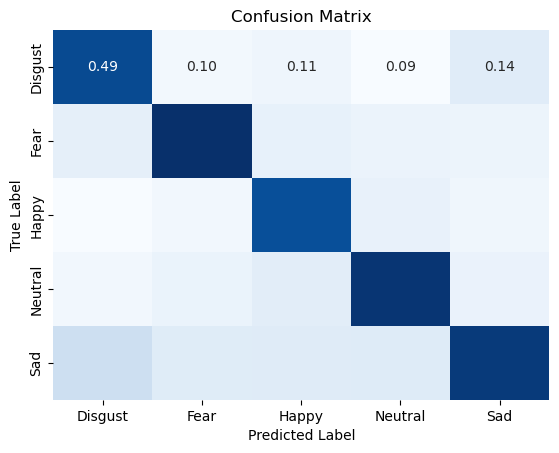

In [44]:
best_params =   clf.best_params_
# Create an MLP classifier with the best hyperparameters
mlp_model = MLPClassifier(**best_params)


mlp_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_train_pca)


# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Get unique class labels
classes = sorted(set(y_train))


conf_mat = confusion_matrix(y_train, y_pred)

# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy: 21.30%
Accuracy: 21.30%


Text(50.722222222222214, 0.5, 'True Label')

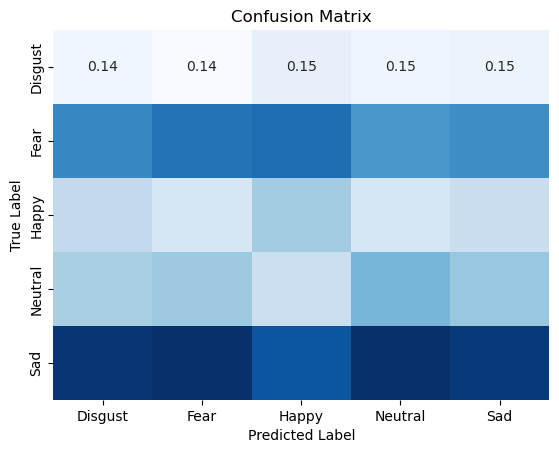

In [45]:
y_pred = mlp_model.predict(X_test_pca)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [231]:
freq_accuracy = []
for i in range(5):
    data = df.iloc[:, (i+5)::5]
    new_df = result_horizontal = pd.concat([df.iloc[:,:5], data], axis=1)
    #test_train_split
    condition = new_df['Session'] == 3
    
    #test
    test = new_df[condition]
    X_test_unscaled = test.iloc[:,5:]
    X_test_unscaled
    y_test = test['Label']
    y_test
    
    #train
    train = new_df[~condition]
    X_train_unscaled = train.iloc[:,5:]
    y_train = train['Label']
    groups = train['Group']
    
    
    #scale data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_unscaled)
    X_test = scaler.transform(X_test_unscaled)
    
    
    #perform pca
    pca = PCA(n_components=.95)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    #MLP Hyper Parameter Tuning
    mlp = MLPClassifier(max_iter=250)
    parameter_space = {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 1],
        'learning_rate': ['constant','adaptive'],
    }
    kf = StratifiedGroupKFold(n_splits=3)
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf.split(X_train_pca, y_train, groups=groups))
    clf.fit(X_train_pca, y_train)
    best_params =   clf.best_params_


    
    # Create an MLP classifier with the best hyperparameters
    mlp_model = MLPClassifier(**best_params)

    #train model
    mlp_model.fit(X_train_pca, y_train)


    #test model
    y_pred = mlp_model.predict(X_test_pca)
    
    
    # Evaluate the model
    freq_accuracy.append(accuracy_score(y_test, y_pred))


E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
E:\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

In [232]:
print(freq_accuracy)
print(np.mean(freq_accuracy))
print(np.std(freq_accuracy))

[0.21088709677419354, 0.2125, 0.22933467741935484, 0.2595766129032258, 0.26814516129032256]
0.23608870967741935
0.023733786705318838


## Plotting Frequency Band activation for Different Emotions

In [178]:
emotions = ["Sad","Fear","Neutral","Disgust","Happy"]
#loop for each frequency band, grabbing specific columns
averages_all_bands = []
for i in range(5):
    averages_one_band = []
    freq = df.iloc[:,(5+i)::5]
    freq['Label'] = df['Label']
    #loop for each emotion
    for emotion in emotions:
        condition = freq['Label'] == emotion
        freq_emotion = freq[condition]
        freq_emotion = freq_emotion.drop('Label',axis = 1)
        averages_one_band.append(freq_emotion.mean(axis = 0))
    averages_all_bands.append(averages_one_band)

FP1_Delta   -3.321159
FP2_Delta   -3.317715
AF3_Delta   -3.373986
AF4_Delta   -3.338322
F7_Delta    -3.327101
               ...   
CB1_Delta   -3.308503
O1_Delta    -3.293901
OZ_Delta    -3.335012
O2_Delta    -3.291216
CB2_Delta   -3.313517
Length: 61, dtype: float64

In [140]:
#get average channels for Happy
condition = test['Label'] == "Happy"
test1 = test[condition]
Happy = test1.drop('Label',axis = 1)
Happy_mean = Happy.mean(axis = 0)
Happy_mean

FP1_Delta   -3.319860
FP2_Delta   -3.314716
AF3_Delta   -3.374573
AF4_Delta   -3.336028
F7_Delta    -3.325544
               ...   
CB1_Delta   -3.308994
O1_Delta    -3.290345
OZ_Delta    -3.335879
O2_Delta    -3.281640
CB2_Delta   -3.310067
Length: 61, dtype: float64

,FP1_Delta,FP2_Delta,AF3_Delta,AF4_Delta,F7_Delta,F5_Delta,F3_Delta,F1_Delta,FZ_Delta,F2_Delta,...,PO3_Delta,POZ_Delta,PO4_Delta,PO6_Delta,PO8_Delta,CB1_Delta,O1_Delta,OZ_Delta,O2_Delta,CB2_Delta
0,-3.422360,-3.377032,-3.435714,-3.488029,-3.421682,-3.500498,-3.499950,-3.505825,-3.545753,-3.539859,...,-3.422356,-3.428423,-3.472049,-3.425710,-3.405186,-3.353276,-3.378613,-3.392977,-3.441302,-3.350545
1,-3.258561,-3.224803,-3.302417,-3.277991,-3.321079,-3.362597,-3.373859,-3.395222,-3.360943,-3.344526,...,-3.384198,-3.343603,-3.300584,-3.324448,-3.283812,-3.297098,-3.351420,-3.327682,-3.360849,-3.253718
2,-3.284074,-3.158512,-3.314899,-3.242294,-3.355063,-3.337175,-3.318993,-3.372563,-3.359504,-3.327640,...,-3.362674,-3.331139,-3.329105,-3.346174,-3.341810,-3.331627,-3.341673,-3.322186,-3.299664,-3.339905
3,-3.201600,-3.146273,-3.255502,-3.258364,-3.352463,-3.373498,-3.436378,-3.456645,-3.441171,-3.384730,...,-3.263471,-3.256236,-3.293109,-3.294980,-3.304871,-3.317393,-3.283762,-3.272002,-3.293371,-3.286941
4,-3.358728,-3.264888,-3.386540,-3.329711,-3.415464,-3.461057,-3.385671,-3.380077,-3.393936,-3.385554,...,-3.390802,-3.357890,-3.374088,-3.401242,-3.391242,-3.377393,-3.349128,-3.346128,-3.351484,-3.330132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29975,-3.298987,-3.351946,-3.473701,-3.436017,-3.362107,-3.146619,-3.462940,-3.498076,-3.556567,-3.629457,...,-3.236740,-3.321299,-3.342432,-3.167400,-3.166821,-3.311063,-3.310873,-3.302322,-3.306435,-3.308975
29976,-3.034549,-3.105493,-3.045580,-3.189512,-3.068784,-3.163625,-3.115498,-3.167105,-3.237410,-3.184805,...,-2.949228,-3.014235,-3.048062,-2.993799,-2.991253,-2.943402,-2.943196,-2.912668,-3.071498,-3.075733
29977,-3.366225,-3.375103,-3.383754,-3.434024,-3.418717,-3.500877,-3.555150,-3.455310,-3.517504,-3.479223,...,-3.385092,-3.392725,-3.351079,-3.272295,-3.270899,-3.329962,-3.329966,-3.359611,-3.318643,-3.315458
29978,-3.345488,-3.398680,-3.434542,-3.439790,-3.438420,-3.367907,-3.437436,-3.457571,-3.470152,-3.460451,...,-3.261915,-3.353225,-3.261747,-3.281068,-3.279801,-3.202046,-3.200764,-3.197803,-3.214422,-3.212884


In [115]:
eeg_raw = mne.io.read_raw_cnt('data/13_2_20180806.cnt')
channels_to_drop = ['M1', 'M2' ,'FPZ','VEO', 'HEO']
eeg_raw.drop_channels(channels_to_drop)
eeg_raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, FT7, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-06-08 09:49:30 UTC
 nchan: 61
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>

C:\Users\Chris\AppData\Local\Temp\ipykernel_22220\2224005920.py:17: RuntimeWarning: Estimated head radius (97.8 cm) is above the 99th percentile for adult head size.
  mne.viz.plot_topomap(averages_all_bands[i][j], eeg_raw.info, cmap=cm.viridis,sphere = 'auto', contours=6, size=1, axes = ax)


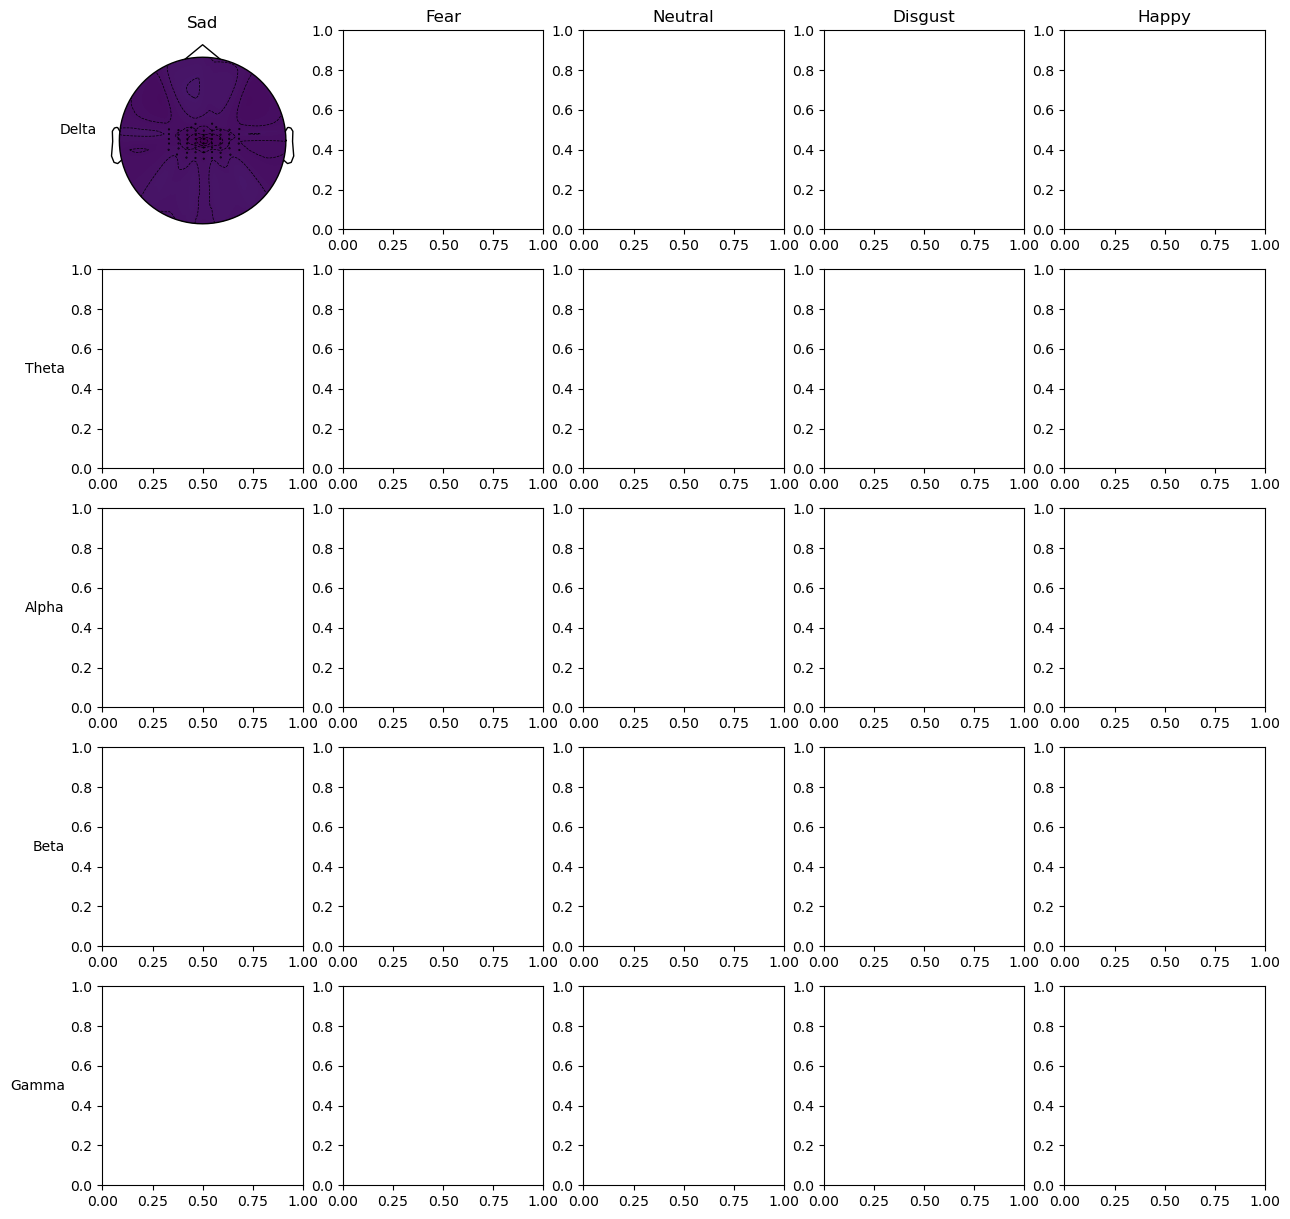

C:\Users\Chris\AppData\Local\Temp\ipykernel_22220\2224005920.py:17: RuntimeWarning: Estimated head radius (97.8 cm) is above the 99th percentile for adult head size.
  mne.viz.plot_topomap(averages_all_bands[i][j], eeg_raw.info, cmap=cm.viridis,sphere = 'auto', contours=6, size=1, axes = ax)
C:\Users\Chris\AppData\Local\Temp\ipykernel_22220\2224005920.py:17: RuntimeWarning: Estimated head radius (97.8 cm) is above the 99th percentile for adult head size.
  mne.viz.plot_topomap(averages_all_bands[i][j], eeg_raw.info, cmap=cm.viridis,sphere = 'auto', contours=6, size=1, axes = ax)
C:\Users\Chris\AppData\Local\Temp\ipykernel_22220\2224005920.py:17: RuntimeWarning: Estimated head radius (97.8 cm) is above the 99th percentile for adult head size.
  mne.viz.plot_topomap(averages_all_bands[i][j], eeg_raw.info, cmap=cm.viridis,sphere = 'auto', contours=6, size=1, axes = ax)
C:\Users\Chris\AppData\Local\Temp\ipykernel_22220\2224005920.py:17: RuntimeWarning: Estimated head radius (97.8 cm) is ab

In [218]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

# Emotion labels on the top
for i, emotion_label in enumerate(emotions):
    axes[0, i].set_title(emotion_label)

# Frequency labels on the left
frequency_labels = ['Delta'	,'Theta',	'Alpha'	,'Beta','Gamma']
for i, frequency_label in enumerate(frequency_labels):
    axes[i, 0].set_ylabel(frequency_label, rotation=0, ha='right', va='center')



for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        mne.viz.plot_topomap(averages_all_bands[i][j], eeg_raw.info, cmap=cm.viridis,sphere = 'auto', contours=6, size=1, axes = ax) 
 # Label the axes
        ax.set_title(f'Emotion {i + 1}\nFrequency {j + 1}')